In [2]:
import heapq as hq
import networkx as nx
import matplotlib.pyplot as plt
from random import shuffle

class Event:
    def __init__(self, time, action, bm):
        self.time = time
        self.action = action
        self.bm = bm
    def __lt__(self, other):
        return (self.time, self.bm) < (other.time, other.bm)
    def __le__(self, other):
        return (self.time, self.bm) <= (other.time, other.bm)

def shuffle0(passengers):
    for i in range(len(passengers)):
        x = [j for j in range(len(passengers[i]))]
        shuffle(x)
        passengers[i] = [passengers[i][k] for k in x]

#def save(passengers, bms): # vielleicht?
    

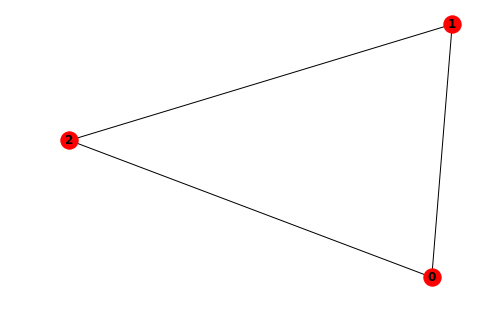

In [16]:
graph = nx.

graph.add_node(0)
graph.add_node(1)
graph.add_node(2)

graph.add_edge(0,1)
graph.add_edge(1,2)
graph.add_edge(0,2)

nx.draw(graph, with_labels = True, font_weight = 'bold')

NetworkXError: Node 0 has no position.

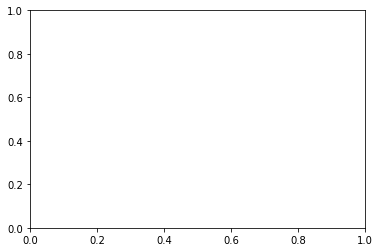

In [16]:
G = nx.Graph()
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2],
                       node_color='g',
                       node_size=500,
                      alpha=0.8)

nx.draw_networkx_edges(G,pos,
                    edgeslist=[(0,1),(0,2),(1,2)],
                    width=8,alpha=0.5,edge_color='r')

labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'

nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

In [9]:
def solve(eventq, passengers, bms):
    #save(passengers, bms)
    while eventq:
        if ([len(passengers[i]) == 0 for i in range(len(passengers))] == [True]*len(passengers)) and ([bms[i]['n_passengers'] == 0 for i in range(len(bms))] == [True]*len(bms)):
            return print('Ende')
        event = hq.heappop(eventq)
        bm = bms[event.bm]
        current_node = bm['itinerary'][bm['stop'] % len(bm['itinerary'])]
        next_node = bm['itinerary'][(bm['stop']+1) % len(bm['itinerary'])]
        current_node_time_idx = (bm['stop'] % len(bm['itinerary']))%len(bm['t_times'])
        G[current_node]
        print('Fahrzeug {} ist am Knoten {}, der nächste Halt {}'.format(bm['name'],current_node, next_node))
        if event.action == 'load':
            free = bm['capacity'] - bm['n_passengers']
            print('Fahrzeug {} load'.format(bm['name']))
            print('Fahrzeug {} hat {} Plätze frei'.format(bm['name'],free))
            while bm['n_passengers'] < bm['capacity']:
                waiting = [idx for idx, passenger in enumerate(passengers[current_node]) if passenger['station'] in bm['itinerary']]
                #print('Warten: {}'.format(waiting))
                if not waiting:
                    break
                passenger = passengers[current_node].pop(waiting[0])
                print('Passagier:', passenger)
                bm['n_passengers'] += 1
                hq.heappush(eventq, Event(event.time + passenger['exit_time'],'exit', event.bm))
                print('time:', event.time+passenger['exit_time'])
            hq.heappush(eventq, Event(event.time + bm['t_times'][current_node_time_idx], 'load', event.bm))
            bm['stop'] += 1
        # Generate events for exiting passengers
        elif event.action == 'exit':
            print('Fahrzeug {}, Passagiere steigenaus, time {}'.format(bm['name'], event.time))
            bm['n_passengers'] -= 1
            print('Es sind {} Passagiere in der Bahn'.format(bm['n_passengers']))
        else:
            raise Exception('Unknown event action')



G = nx.Graph()
G.add_node('Hbf')
G.add_node('INF')
G.add_node('Phil')
G.add_node('Bism')
G.add_node('Uni')
G.add_node('Hand')
G.add_node('Rohr')
G.add_node('Zieg')
#Rundfahrt
G.add_edge('INF', 'Hbf')
G.add_edge('Phil', 'INF')
G.add_edge('Uni', 'Phil')
G.add_edge('Bism', 'Uni')
G.add_edge('Hbf', 'Bism')
#Zubringer
G.add_edge('INF', 'Hand')
G.add_edge('Hbf', 'Rohr')
G.add_edge('Uni', 'Zieg')

In [11]:
passengers = [#
    [{'station': 1, 'exit_time': 10}]*100 + [{'station': 2, 'exit_time': 20}]*100,  # 0 => Station 'A'
    [{'station': 0, 'exit_time': 20}]*1000 + [{'station': 2, 'exit_time': 10}]*20, # 1 => Station 'B'
    [{'station': 0, 'exit_time': 10}]*10 + [{'station': 1, 'exit_time': 20}]*1000  # 2 => Station 'C'
              ]#
bms = [{'n_passengers': 0, 'capacity': 31, 'stop': 0, 'itinerary': [2, 1, 0, 1], 'name': 0, 't_times': [12, 12, 12]},
    {'n_passengers': 0, 'capacity': 20, 'stop': 0, 'itinerary': [0, 1, 2, 1], 'name': 1, 't_times': [12, 12, 12]}
       ]#

 
# shuffle passengers
shuffle0(passengers)


event0 = Event(0,'load',0)
event1 = Event(0,'load',1)
eventq = []
hq.heappush(eventq, event0)
hq.heappush(eventq, event1)

In [12]:
solve(eventq, passengers, bms)

Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 31 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 1, 'exit_time': 20}
time: 20
Passagier: {'station': 

Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Passagier: {'station': 0, 'exit_time': 20}
time: 128
Fahrzeug 0 ist am Knoten 0, der nächste Halt 1

Passagier: {'station': 0, 'exit_time': 20}
time: 248
Passagier: {'station': 0, 'exit_time': 20}
time: 248
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 236
Es sind 30 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 236
Es sind 29 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 236
Es sind 28 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 236
Es sind 27 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1
Fahrzeug 1, Passagiere steigenaus, time 236
Es sind 19 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 2, der nächste Halt 1
Fahrzeug 0 load
Fahrzeug 0 hat 4 Plätze frei
Passagier: {'station': 1, 'exit_time': 20}
time: 260
Passagier: {'station': 1, 'exit_time': 20}
time: 260
Passagier: {'station': 1, 'exit_time': 20}
time: 260
Passagier: {'stati

Fahrzeug 0, Passagiere steigenaus, time 368
Es sind 9 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 368
Es sind 8 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 368
Es sind 7 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 368
Es sind 6 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 368
Es sind 5 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 368
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 2
Fahrzeug 0, Passagiere steigenaus, time 368
Es sind 3 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0
Fahrzeug 1, Passagiere steigenaus, time 368
Es sind 19 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0
Fahrzeu

Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2
Fahrzeug 1 load
Fahrzeug 1 hat 17 Plätze frei
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passagier: {'station': 0, 'exit_time': 20}
time: 512
Passag

Es sind 9 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2
Fahrzeug 1, Passagiere steigenaus, time 634
Es sind 8 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2
Fahrzeug 1, Passagiere steigenaus, time 634
Es sind 7 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2
Fahrzeug 1, Passagiere steigenaus, time 634
Es sind 6 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2
Fahrzeug 1, Passagiere steigenaus, time 634
Es sind 5 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2
Fahrzeug 1, Passagiere steigenaus, time 634
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 1, der nächste Halt 0
Fahrzeug 0 load
Fahrzeug 0 hat 0 Plätze frei
Fahrzeug 1 ist am Knoten 1, der nächste Halt 2
Fahrzeug 1 load
Fahrzeug 1 hat 16 Plätze frei
Fahrzeug 0 ist am Knoten 0, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 644
Es sind 30 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächs

Fahrzeug 0 ist am Knoten 0, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 884
Es sind 10 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 884
Es sind 9 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 884
Es sind 8 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 884
Es sind 7 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 884
Es sind 6 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 884
Es sind 5 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 884
Es sind 4 Passagiere in der Bahn
Fahrzeug 0 ist am Knoten 0, der nächste Halt 1
Fahrzeug 0, Passagiere steigenaus, time 884
Es sind 3 Passagiere in der Bahn
Fahrzeu

Passagier: {'station': 1, 'exit_time': 20}
time: 1148
Passagier: {'station': 1, 'exit_time': 20}
time: 1148
Passagier: {'station': 1, 'exit_time': 20}
time: 1148
Passagier: {'station': 1, 'exit_time': 20}
time: 1148
Passagier: {'station': 1, 'exit_time': 20}
time: 1148
Passagier: {'station': 1, 'exit_time': 20}
time: 1148
Fahrzeug 0 ist am Knoten 1, der nächste Halt 2
Fahrzeug 0 load
Fahrzeug 0 hat 31 Plätze frei
Fahrzeug 1 ist am Knoten 1, der nächste Halt 0
Fahrzeug 1 load
Fahrzeug 1 hat 0 Plätze frei
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1
Fahrzeug 1, Passagiere steigenaus, time 1148
Es sind 19 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1
Fahrzeug 1, Passagiere steigenaus, time 1148
Es sind 18 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1
Fahrzeug 1, Passagiere steigenaus, time 1148
Es sind 17 Passagiere in der Bahn
Fahrzeug 1 ist am Knoten 0, der nächste Halt 1
Fahrzeug 1, Passagiere steigenaus, time 1148
Es sind 16 Passagiere

Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'exit_time': 20}
time: 1412
Passagier: {'station': 1, 'e

passengers = [#
    [{'station': 'Bism', 'exit_time': 10}]*100 + [{'station': 'Uni', 'exit_time': 20}]*100,#
    [{'station': 'Phil', 'exit_time': 20}]*1000 + [{'station': 'Uni', 'exit_time': 10}]*20,#
    [{'station': 'Phil', 'exit_time': 10}]*10 + [{'station': 'Bism', 'exit_time': 20}]*1000#
              ]#
bms = [{'n_passengers': 0, 'capacity': 31, 'stop': 0, 'itinerary': ['Uni', 'Bism', 'Phil', 'Bism'], 'name': 0, 't_times': [12, 12, 12]},
       {'n_passengers': 0, 'capacity': 20, 'stop': 0, 'itinerary': ['Phil', 'Bism', 'Uni', 'Bism'], 'name': 1, 't_times': [12, 12, 12]}]

# shuffle passengers
shuffle0(passengers)



event0 = Event(0,'load',0)
event1 = Event(0,'load',1)
eventq = []
hq.heappush(eventq, event0)
hq.heappush(eventq, event1)
print(eventq)